In [1]:
%reload_ext autoreload
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns


import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import statsmodels.api as sm

In [3]:
import multiprocessing

In [4]:
from __future__ import division

p = 20



In [5]:
n = 100



In [6]:
Y = np.random.binomial(1, 0.5, size=n)

In [20]:
mu1 = 0.1 * np.ones((p,)) / math.sqrt(p)
mu0 = -mu1

X = np.random.multivariate_normal(mu1, np.eye(p), n) * Y.reshape((-1, 1)) \
    + np.random.multivariate_normal(mu0, np.eye(p), n) * (1 - Y.reshape((-1, 1)))


In [21]:
sm_lr = sm.Logit(Y, sm.add_constant(X, prepend=False))
sm_lr_fit = sm_lr.fit()

Optimization terminated successfully.
         Current function value: 0.631627
         Iterations 5


In [22]:
print sm_lr_fit.summary()

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       79
Method:                           MLE   Df Model:                           20
Date:                Tue, 04 Apr 2017   Pseudo R-squ.:                 0.08770
Time:                        16:41:41   Log-Likelihood:                -63.163
converged:                       True   LL-Null:                       -69.235
                                        LLR p-value:                    0.9110
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2999      0.247      1.216      0.224      -0.183       0.783
x2            -0.2624      0.264     -0.995      0.320      -0.779       0.254
x3             0.0738      0.304      0.243      0.8

In [52]:
from __future__ import division

def my_logistic_SGD(X_, Y_, w_init, 
                  lr, 
                  size_batch, 
                  n_iter): 
    
    w_sgd_ = []
    
    n_, p_ = X_.shape
    
    w_ = w_init.copy()
    
    for _ in xrange(n_iter):
        
        ind_batch = np.random.choice(n_, replace=True, size=size_batch)
        
        tmp1 = Y_[ind_batch] * X_[ind_batch, :].dot(w_)
        
        tmp2 = X_[ind_batch, :] * Y_[ind_batch].reshape((-1, 1))
        

        
        tmp3 = -tmp2.T * np.exp(-np.logaddexp(np.zeros((size_batch)), tmp1)).reshape((1, -1)) 
        
        sgd_ = np.mean(tmp3, axis=1).ravel()
        
        w_ = w_ - lr * sgd_
        
        w_sgd_.append(w_.tolist())
        
    
    return np.array(w_sgd_)


In [67]:
lr = 0.2

size_batch = 10

n_iter = 10000

w_sgd = my_logistic_SGD(sm.add_constant(X, prepend=False), 2 * Y - 1, np.zeros((p + 1,)), lr, size_batch, n_iter)

print w_sgd.shape

(10000, 21)


<IPython.core.display.Javascript object>


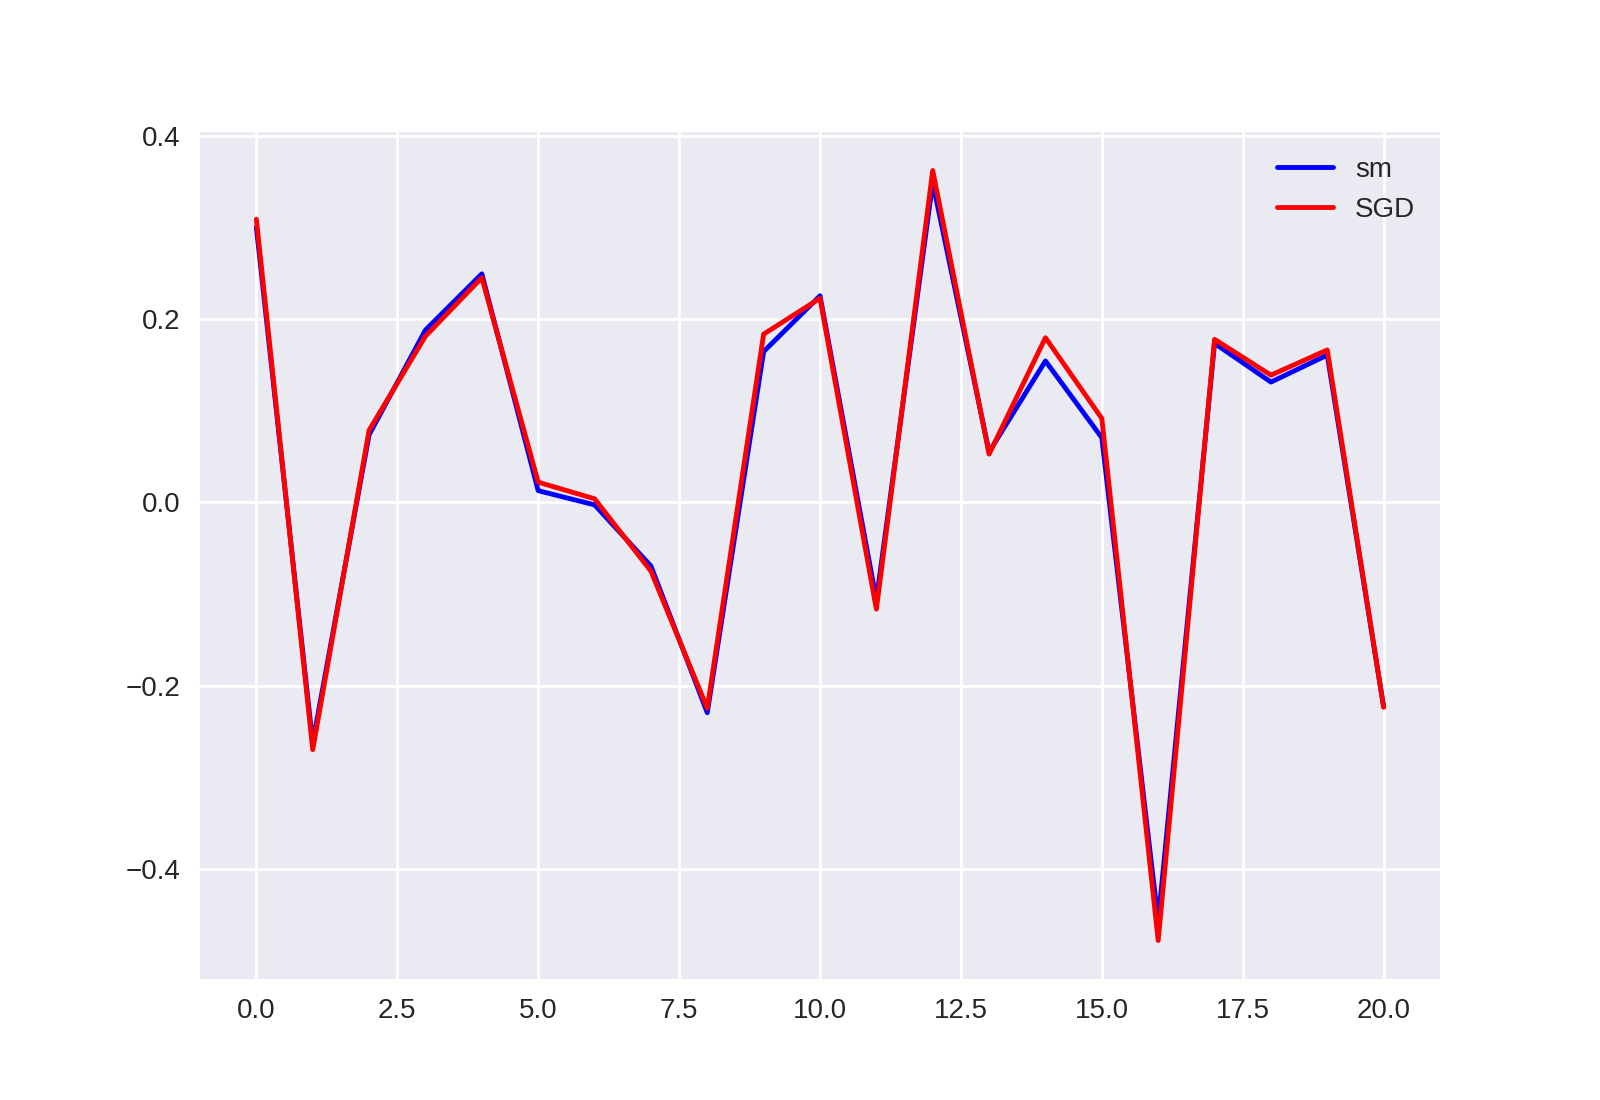

In [68]:
plt.figure()

plt.plot(sm_lr_fit.params, 'b', label="sm")
plt.plot(np.mean(w_sgd, axis=0), 'r', label='SGD')

plt.legend()